In [149]:
<<"MaTeX`"

colors=(("DefaultPlotStyle"/.(Method/. Charting`ResolvePlotTheme["Scientific",ListLinePlot]))/. Directive[x_,__]:>x)
fs = 12; fsD = 11;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black}
texStyleD := {FontFamily -> "Latin Modern Roman", FontSize -> fsD, Black}

graphsOpts:={Mesh->None,BaseStyle->texStyle,ImageSize->350}

{RGBColor[0.9, 0.36, 0.054], RGBColor[0.365248, 0.427802, 0.758297], 
 
>   RGBColor[0.945109, 0.593901, 0.], RGBColor[0.645957, 0.253192, 0.685109], 
 
>   RGBColor[0.285821, 0.56, 0.450773], RGBColor[0.7, 0.336, 0.], 
 
>   RGBColor[0.491486, 0.345109, 0.8], RGBColor[0.71788, 0.568653, 0.], 
 
>   RGBColor[0.70743, 0.224, 0.542415], RGBColor[0.287228, 0.490217, 0.664674], 
 
>   RGBColor[0.982289, 0.577132, 0.0115425], RGBColor[0.587674, 0.287728, 0.75007], 
 
>   RGBColor[0.426209, 0.558155, 0.2778], RGBColor[0.943149, 0.414556, 0.0714083], 
 
>   RGBColor[0.414974, 0.393632, 0.784299]}

# Simulaciones analíticas y numéricas
## Consejos para comenzar

### Jonathan Urrutia


#### Seminario de Estudiantes
#### Departamento de Fotofísica y Películas Delgadas
#### Instituto de Ciencias Aplicadas y Tecnología



##### 27 de octubre de 2023

<div hidden>
$\def\dd{\text{d}}$
$\def\dv#1#2{\dfrac{\text{d} #1}{\text{d}#2}}$
$\def\mdv#1#2#3{\dfrac{\text{d}^{#3} #1}{\text{d}#2^{#3}}}$
$\def\vb#1{\mathbf{#1}}$
$\def\pdv#1#2#3{\dfrac{\partial^{#3} #1}{\partial #2^{#3}}}$
</div>

## Simulación o animación

<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/5/55/1-4-RelacionDispersion.png width="500" height="300"><img src=https://upload.wikimedia.org/wikipedia/commons/4/46/Ne11_VSH.gif width="400" height="300">
</center>

## ¿Qué entendemos por simulación?


<table style="width:100%">
  <tr>
    <th style="width:40%" ><center>Planteamiento físico</center></th>
    <th style="width:60%" ><center>Simulación con animación</center></th>
  </tr>
  <tr>
    <td>
        <ul>
            <li>Masa $m$ acoplada a un resorte con constante $m\omega^2$:
                $$
                m\ddot{\vb{r}} + m\omega^2 \vb{r} = \vb{0}.
                $$
            </li>
            <li>Energías del sistema:
                $$
                \begin{aligned}
                T &= \dfrac{m}{2}\dot{\vb{r}}\cdot\dot{\vb{r}}, \\
                U &= \dfrac{m\omega^2}{2}\vb{r}\cdot\vb{r}.
                \end{aligned}
                $$
            </li>
            <li>
                La posición es función del tiempo  $t$: $\vb{r}(t)$.
            </li>
        </ul>    
    </td>
    <td>
        <center>
        <img src= img/spring_normal.gif width="420" height="300"> 
        </center>
    </td>
  </tr>
</table> 




## Numérico vs. analítico

Un **modelo** consiste en plantear una ecuación diferencial que describa un sistema físico de interés. 
$$
\nabla^2 \psi + k^2 \psi = 0, \qquad \text{¿Ecuación de Helmholtz = Ondas?}
$$

 **Simulaciones analíticas**
  - Propuesta de **modelos**: Abstracción del sistema físico en uno que se comporte cómo él
    - ¿Oscilador armónico de nuevo?
    - Análogos Clásico-Cuántico
       
 **Simulaciones numéricas**
  - Solución aproximada a la ecuación diferencial a resolver

En general, se emplan técnicas de ambos enfoque para determinar el problema por completo.

## Enfoque numérico

**Recomendaciones**
 - Familiarizarse con un lenguaje de programación
   - Algoritmos básicos: Cálculo de raíces, máximos, mínimos, derivadas e integrales 
   - Visualización de datos: Gráficas en 2D, 3D y *maquillaje* de figuras
 - Investigar el método apropiado para cada problema a resolver
 - Definir el **error** que estamos dispuestos a aceptar

<span style="color:blue">**¡Muy importante!**</span>
 - Recuerda que la computadora *sólo entiende cartesiano*.
 - El álgebra de las computadoras es la de **punto flotante**, esto significa que las igualdades estrictas rara vez ocurren.
 - Las computadoras no entienden de unidades físicas. ¡Adimensionaliza tus cálculos!
 - No sabes cuánto tiempo se va a tardar tu cálculo por lo que lo mejor es siempre ir guardando la información conforme se vayan realizando los cálculos.
 - Incluso si son pocos segundos, estos puede facilitar el proceso de *maquillado* para visualización.

## Solución a la ecuación de Laplace

<table style="width:100%">
  <tr>
    <td  style="width:40%" >
Un potencial electrostático $\phi(\vb{r})$ en una región del espacio sin densidad de carga obedece la ecuación de Laplace dada por
$$
\nabla^2\phi(\vb{r}) = 0.
$$
Para determinar el problema por completo:
 <ul>
     <li><b>Imponer condiciones de frontera</b> $\phi_0$ en la región a calcular $\phi(\vb{r})$.</li>
     <li><b>Discretizar el problema</b>: Seleccionar una colección finita de puntos $\vb{r}_k$ donde se resuleve el pontencial.</li>
</ul>
    </td>
    <td  style="width:40%" >
        <center>
        <img src= img/grid.jpg width="420" height="300"> 
        </center>
    </td>
  </tr>
</table> 

### Método de relajación

<table style="width:100%">
  <tr>
    <td  style="width:60%" >
 <ul>
     <li><b>Solución aproximada</b> a la ecuación de Laplce</li>
     <li><b>Método iterativo:</b> Debe definirse una toleracia al error de la solución paradeterse.</li>
     <li>En 2D empleando coordendas cartesianas, la solución, el método de relajación para la $(t+1)$-ésima iteración da como resultado
         $$\phi^{t+1}_{i,j}=\frac{1}{4}(\phi^t_{i-1,j}+\phi^t_{i+1,j}+\phi^t_{i,j-1}+\phi^t_{i,j-1}),$$
         con $\phi^t_{i,j} = \phi(\vb{r}_{i,j}) = \phi(x_i,y_j)$.</li>
</ul>
    </td>
    <td  style="width:40%" >
        <center>
        <img src= img/grid.jpg width="350" height="300"> 
        </center>
    </td>
  </tr>
</table> 

Se puede demostrar la validez del método de ralajación al expandir en serie de Taylor cada uno de los potenciales vecinos:
$$
\begin{aligned}
\phi \left (x_{o} \pm \delta,y_{o} \right )  & = \phi \left (x_{o},y_{o}\right ) \pm \left. \frac {\partial \phi}{\partial x} \right |_{x=x_{o}} \delta + \left. \frac {1}{2} \frac {\partial^2 \phi}{\partial x^2}\right |_{x=x_{o}} \delta^2  +O\left( \delta^3 \right) \\
\phi \left (x_{o},y_{o}\pm \delta,z_{o} \right )  &= \phi \left (x_{o},y_{o} \right ) \pm \left. \frac {\partial \phi}{\partial y} \right |_{y=y_{o}} \delta + \left. \frac {1}{2} \frac {\partial^2 \phi}{\partial y^2}\right |_{y=y_{o}} \delta^2  +O\left( \delta^3 \right).
\end{aligned}
$$
Entonces, a segundo orden resulta que
$$
\phi \left (x_{o} \pm \delta,y_{o} \right )+\phi \left (x_{o},y_{o}\pm \delta \right ) = 4\phi \left (x_{o},y_{o} \right ) +  \left. \nabla^2\phi \right |_{\left(x=x_{o},y=y_{o}\right)}\delta^2,
$$
y dado que el potencial electrostático satisface la ecuación de Laplace:
$$
\phi \left (x_{o},y_{o} \right )=\frac14  \left[\phi \left (x_{o} + \delta,y_{o} \right )+\phi \left (x_{o} - \delta,y_{o} \right )+\phi \left (x_{o},y_{o} + \delta \right )+\phi \left (x_{o},y_{o} - \delta \right )\right]
$$

## Ejemplo: Condición de frontera circular

<center>
<img src= img/grid_numCirc.jpg width="500" height="300"> 
</center>

-Graphics--Graphics-
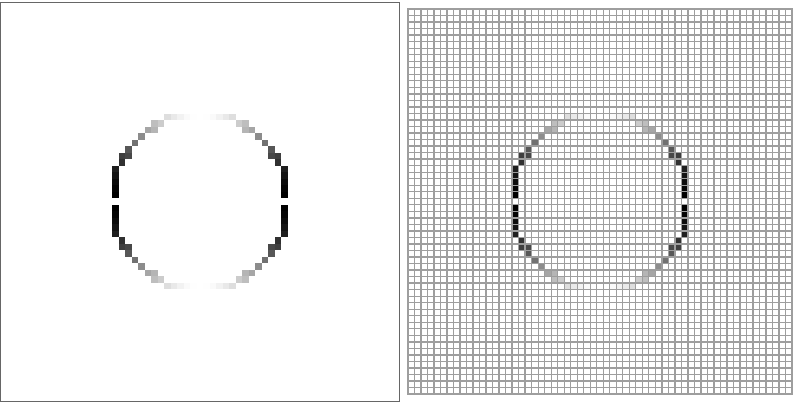

In [111]:
proporcion = 2; 

n = 60; (*tiene que ser par. Vamos a considerar un arreglo de n-1 x n-1*)
b = Floor[n/2 - 1] (*Número de datos*)
a = Floor[b/proporcion]

r[x_, y_] := N@Sqrt[(x - (b + 1.))^2. + (y - (b + 1.))^2.] (*Circunferencia centrada en (b+1, b+1)*)
seno2[x_, y_] := ( (y - (b + 1.)) / r[x, y] )^2.  (*coordenada y / radio*)

(*Condiciones de frontera*)
phi0[x_, y_] :=  If[a <= r[x, y] <= b, 0., 
                      If[a - 1 < r[x, y] < a, seno2[x, y], 
                         0.]] (*hacemos que de en una circuncerencia los valores del seno*)

(*Arreglo de puntos, con puros ceros y nuestra condición de frontera*)
phi = Array[phi0, {n - 1, n - 1}];

Row[{ArrayPlot[phi,ImageSize->300],ArrayPlot[phi,Mesh->All,ImageSize->300]}]

-Graphics--Graphics-
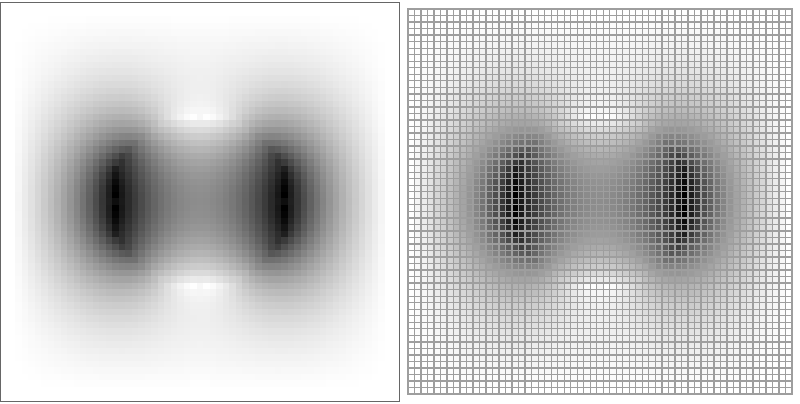

In [132]:
error = 10;

While[
error > 1.*^-5,
 antes = phi; (*Matriz de la iteración t*)
 	For[i = 2, i <= 2 b, i++, 
      For[j = 2, j <= 2 b, j++,
           	If[a - 1 >= r[i, j] || r[i, j] >= a, (*No toca en donde aplicó la función con la finalidad de dejarlo fijo*)
                (*phi = ReplacePart[ phi, {i, j} -> 0.25( phi[[i - 1, j]] + phi[[i + 1, j]] + phi[[i, j - 1]] + phi[[i, j + 1]])]*)
                phi[[i, j]] = 0.25 * ( phi[[i - 1, j]] + phi[[i + 1, j]] + phi[[i, j - 1]] + phi[[i, j + 1]] )]
            ]
        ];
diferencia = Abs[phi - antes];
error = Tr[diferencia*Transpose[diferencia]];
]

Row[{ArrayPlot[phi,ImageSize->300],ArrayPlot[phi,Mesh->All,ImageSize->300]}]

-Graphics3D-
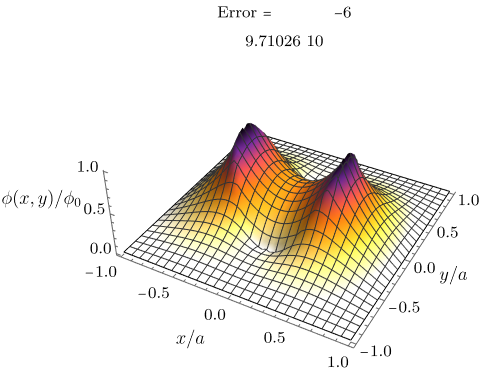

In [159]:
graf = ListPlot3D[phi,
  AxesLabel -> (MaTeX[#, FontSize -> 14] &/@ {"x/a", "y/a", "\\phi(x,y)/\\phi_0"}),
  Mesh -> 25,BaseStyle->texStyle,
  PlotStyle -> Opacity[1],PlotRange->All,
  ColorFunction -> ColorData[{"SunsetColors", "Reverse"}],
  PlotLabel ->   Style["Error = " <> ToString[N[error]], texStyle],
  Boxed -> False,
  DataRange -> {{-1, 1}, {-1, 1}}]

Legended[-Graphics-, Placed[BarLegend[{{SunsetColors, Reverse}, {0, 1}}, 
 
>     LabelStyle -> {FontFamily -> Latin Modern Roman, FontSize -> 12, GrayLevel[0]}, 
 
>     LegendLabel -> -Graphics-, LegendLayout -> Column, LegendMarkerSize -> 300, 
 
>     Charting`AxisLabel -> None, ScalingFunctions -> {Identity, Identity}, 
 
>     Charting`TickSide -> Right, ColorFunctionScaling -> True], After, Identity]]
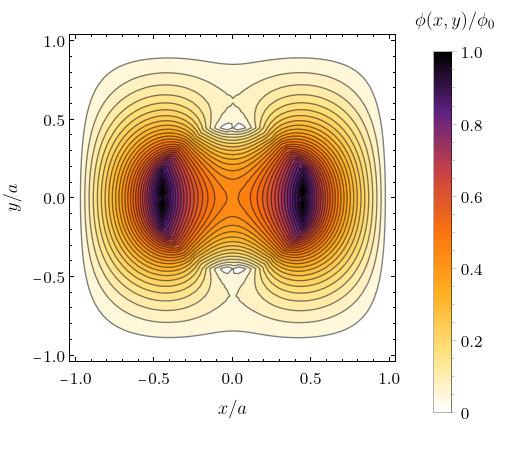

In [162]:
equipotenciales = ListContourPlot[phi,
  DataRange -> {{-1, 1}, {-1, 1}},
  BaseStyle -> texStyle, FrameStyle -> Black,
  PlotLegends -> 
   BarLegend[{{"SunsetColors", "Reverse"}, {0, 1}}, 
    LegendLabel -> MaTeX["\\phi(x,y)/\\phi_0", FontSize -> 14], 
    LabelStyle -> texStyle],
  ColorFunction -> ColorData[{"SunsetColors", "Reverse"}], 
  Contours -> 30, 
  FrameLabel -> {{MaTeX["y/a", FontSize -> 14], 
     None}, {MaTeX["x/a", FontSize -> 14], None}},
  ImageSize -> 300]

In [163]:
phi = Array[phi0, {n - 1, n - 1}];
error = 10;
exp = {ListPlot3D[phi,
  AxesLabel -> (MaTeX[#, FontSize -> 14] &/@ {"x/a", "y/a", "\\phi(x,y)/\\phi_0"}),
  Mesh -> 25,BaseStyle->texStyle,
  PlotStyle -> Opacity[1],PlotRange->All,
  ColorFunction -> ColorData[{"SunsetColors", "Reverse"}],
  PlotLabel ->   Style["Error = " <> ToString[N[error]], texStyle],
  Boxed -> False,
  DataRange -> {{-1, 1}, {-1, 1}}]};

While[
error > 1.*^-5,
 antes = phi; (*Matriz de la iteración t*)
 	For[i = 2, i <= 2 b, i++, 
      For[j = 2, j <= 2 b, j++,
           	If[a - 1 >= r[i, j] || r[i, j] >= a, (*No toca en donde aplicó la función con la finalidad de dejarlo fijo*)
                (*phi = ReplacePart[ phi, {i, j} -> 0.25( phi[[i - 1, j]] + phi[[i + 1, j]] + phi[[i, j - 1]] + phi[[i, j + 1]])]*)
                phi[[i, j]] = 0.25 * ( phi[[i - 1, j]] + phi[[i + 1, j]] + phi[[i, j - 1]] + phi[[i, j + 1]] )]
            ]
        ];
diferencia = Abs[phi - antes];
error = Tr[diferencia*Transpose[diferencia]];

AppendTo[exp,
ListPlot3D[phi,
  AxesLabel -> (MaTeX[#, FontSize -> 14] &/@ {"x/a", "y/a", "\\phi(x,y)/\\phi_0"}),
  Mesh -> 25,BaseStyle->texStyle,
  PlotStyle -> Opacity[1],PlotRange->All,
  ColorFunction -> ColorData[{"SunsetColors", "Reverse"}],
  PlotLabel ->   Style["Error = " <> ToString[N[error]], texStyle],
  Boxed -> False,
  DataRange -> {{-1, 1}, {-1, 1}}]
]

]

In [172]:
Export["lap.gif", exp, "DisplayDurations" -> .1 (*seconds*), 
 "AnimationRepetitions" -> Infinity]

lap.gif

<center>
<img src= img/lap.gif width="600" height="300"> 
</center> 